### Figure 1
- schematic
- spectrogram for NSD and SD
- percentage sleep fraction during first 5h of POST for both SD and NSD sessions


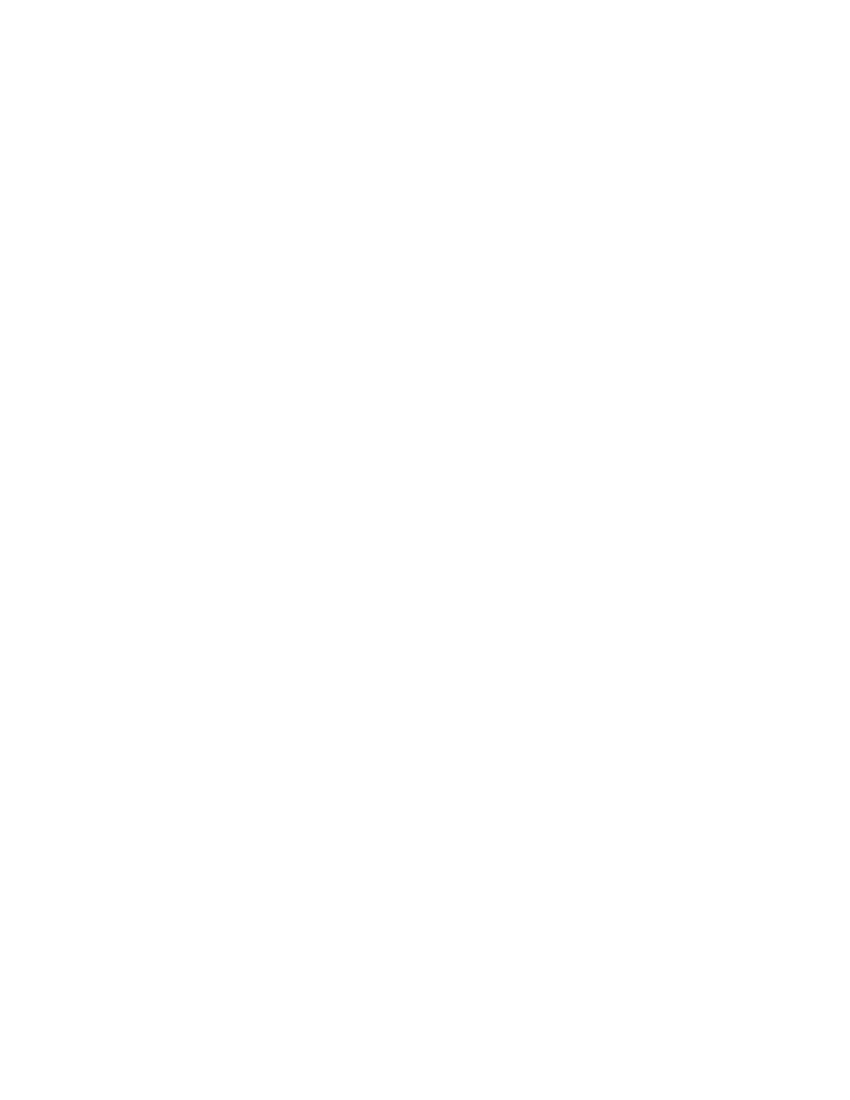

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import subjects
from plotters import violinplot
import pandas as pd
import seaborn as sns
from neuropy.plotting import Fig
from scipy import stats
from subjects import (
    light_cycle_span,
    sns_boxplot_kw,
    stat_kw,
    sns_violin_kw,
    epoch_span,
)

grpdata = subjects.GroupData()
group = ["NSD", "SD"]

# frate
frate = grpdata.frate_ratio_nsd_vs_sd
frate_chunks = grpdata.frate_post_chunks
frate_change = grpdata.frate_change_pre_to_post
colors_frate_change = subjects.colors_sd()

ei_ratio_df = grpdata.ei_ratio

frate_quantiles = grpdata.frate_pre_to_maze_quantiles_in_POST
# frate_quantiles_shuffled= grpdata.frate_pre_to_maze_quantiles_in_POST_shuffled

plt.close()
fig = Fig(grid=(8, 10), fontsize=5, constrained_layout=False, hspace=0.3)

filename = subjects.figpath_sd / "figure1"

### Firing rate in 2.5 hour windows

In [29]:
from matplotlib import ticker
from statannotations.Annotator import Annotator

# ax1 = fig.subplot(fig.gs[3, :2])
# ax2 = fig.subplot(fig.gs[3, 2:4], sharey=ax1)
# axs = [ax1, ax2]
# subfig = fig.add_subfigure(fig.gs[3,2:5])
gs_ = fig.subplot2grid(fig.gs[:3, :5], grid=(2, 2))
# ax1 = fig.subplot(gs_[:2])
# ax2 = fig.subplot(gs_[2:4], sharey=ax1)
# axs = [ax1, ax2]
frate_chunks["frate_log"] = np.log10(frate_chunks["frate"])

for i, n in enumerate(["pyr", "inter"]):
    df = frate_chunks[frate_chunks["neuron_type"] == n]

    # ax = fig.subplot(fig.gs[0, i + 4])
    # plot_kw = dict(data=df, x="zt", y="frate_log", hue="grp", hue_order=group, ax=ax)
    # ax = violinplot(**plot_kw)

    for g, grp in enumerate(["NSD", "SD"]):

        ax = fig.subplot(gs_[g, i])
        plot_kw = dict(data=df[df.grp == grp], x="zt", y="frate_log", ax=ax)
        sns.violinplot(
            **plot_kw,
            color=subjects.colors_sd()[g],
            saturation=1,
            inner="quartile",
            linewidth=0,
        )
        for p in ax.lines:
            p.set_linestyle("-")
            p.set_linewidth(0.5)  # Sets the thickness of the quartile lines
            p.set_color("white")  # Sets the color of the quartile lines
            p.set_alpha(1)

        # stats
        plot_kw["y"] = "frate"
        orders = df.zt.unique()

        # Within groups
        pairs2 = [(orders[_], orders[_ + 1]) for _ in range(3)] + [
            ("PRE", "5-7.5"),
            ("0-2.5", "5-7.5"),
        ]
        annotator = Annotator(pairs=pairs2, **plot_kw, order=orders)
        annotator.configure(test="Wilcoxon", **stat_kw, color=subjects.colors_sd(1)[i])
        annotator.apply_and_annotate()
        # annotator.apply_test().annotate(line_offset_to_group=k)
        annotator.reset_configuration()

        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.legend("", frameon=False)
        if i == 0:
            ax.set_ylabel("Firing rate (Hz)")
        ax.tick_params("x", labelrotation=30)
        ax.set_ylim(-3, 3)

        # if g == 0:
        ax.set_yticks([-2, 0, 2])
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. 0-2.5: Wilcoxon test (paired samples), P_val:4.160e-01 Stat=4.677e+04
0-2.5 vs. 2.5-5: Wilcoxon test (paired samples), P_val:2.003e-07 Stat=3.481e+04
2.5-5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:2.665e-02 Stat=4.300e+04
0-2.5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:7.764e-06 Stat=3.694e+04
PRE vs. 5-7.5: Wilcoxon test (paired samples), P_val:1.458e-03 Stat=4.040e+04
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. 0-2.5: Wilcoxon test (paired samples), P_val:4.556e-03 Stat=1.989e+04
0-2.5 vs. 2.5-5: Wilcoxon test (paired samples), P_val:2.066e-01 Stat=2.240e+04
2.5-5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:2.997e-10 Stat=1.437e+04
0-2.